# Introduction to Data Science: Assignment 1
## Maksim Kaledin

In this report I will describe the building of the prediction model based on Students http://archive.ics.uci.edu/ml/datasets/Student+Performance dataset.

## Data Description and Problem Formulation

The data describes the midterm and final marks of Portuguese students studying Portuguese or math (In this report I analyze Portuguese dataset but the same analysis could be performed for math). We have 30 input features, most of them are categorical and non-categorical can easily be interpreted as categorical (for example, education levels):

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)

Marks are given as
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target.)

Our goal is to construct prediction model for G3 with maximal accuracy considering all other features.

## Preliminary Data Analysis

First, download the data and check for missing values (they may be encoded not with NaN, so use another approach). 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

dataFrame = pd.read_csv("./student/student-por.csv",sep=";")

for i in range(0,len(dataFrame.columns)):
    print(pd.unique(dataFrame[dataFrame.columns[i]]))

['GP' 'MS']
['F' 'M']
[18 17 15 16 19 22 20 21]
['U' 'R']
['GT3' 'LE3']
['A' 'T']
[4 1 3 2 0]
[4 1 2 3 0]
['at_home' 'health' 'other' 'services' 'teacher']
['teacher' 'other' 'services' 'health' 'at_home']
['course' 'other' 'home' 'reputation']
['mother' 'father' 'other']
[2 1 3 4]
[2 3 1 4]
[0 3 1 2]
['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['no' 'yes']
['no' 'yes']
[4 5 3 1 2]
[3 2 4 1 5]
[4 3 2 1 5]
[1 2 5 3 4]
[1 3 2 4 5]
[3 5 1 2 4]
[ 4  2  6  0 10  8 16 14  1 12 24 22 32 30 21 15  9 18 26  7 11  5 13  3]
[ 0  9 12 14 11 13 10 15 17  8 16 18  7  6  5  4 19]
[11 13 14 12 16 17  8 10 15  9  7  6 18 19  0  5]
[11 12 14 13 17 15  7 10 16  9  8 18  6  0  1  5 19]


Let us check the marks in different groups using boxplots.

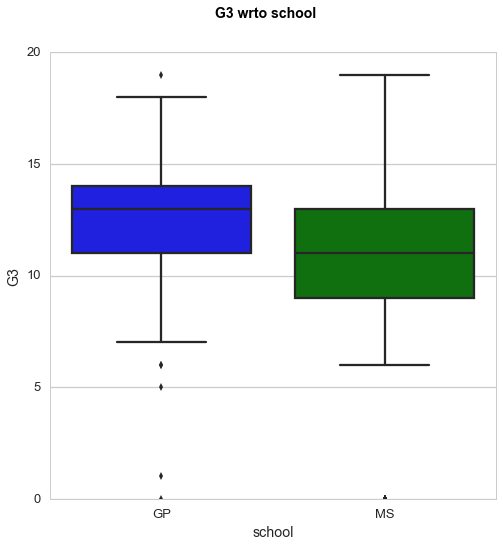

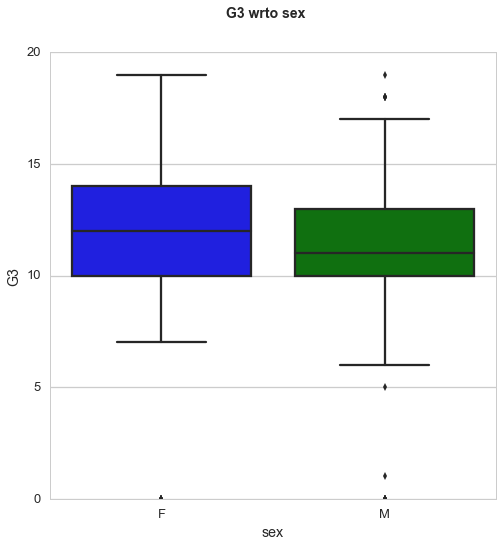

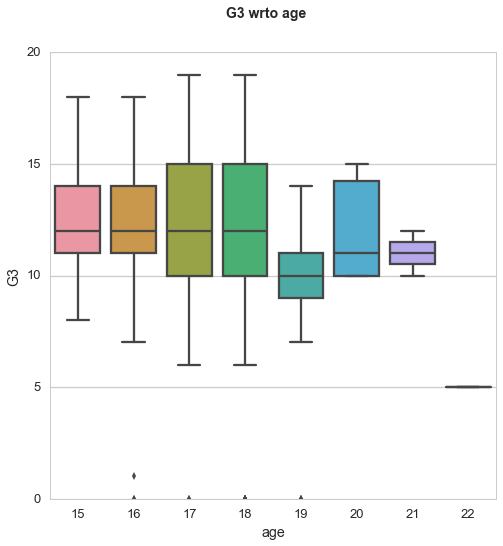

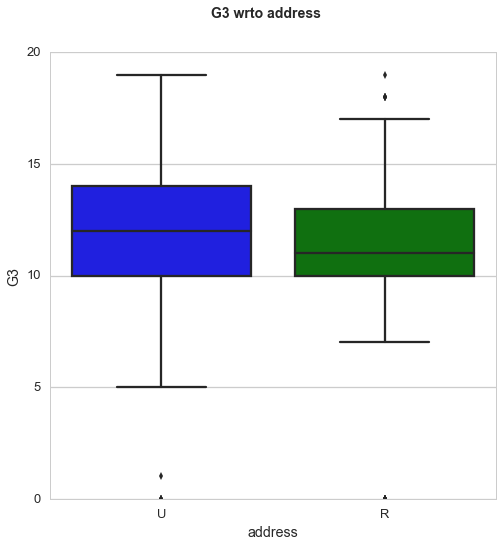

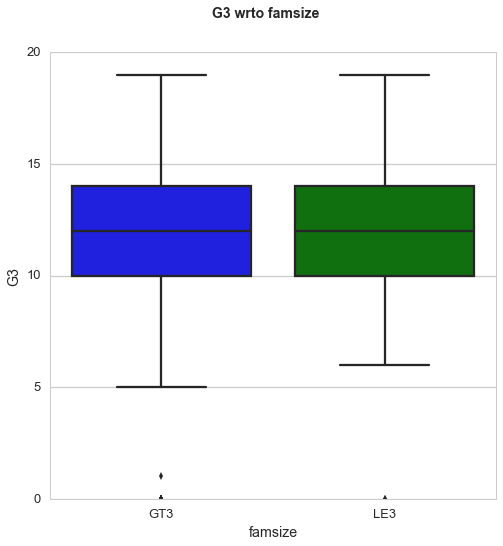

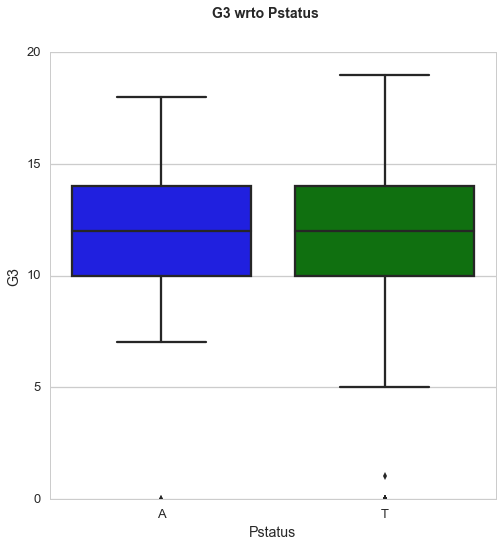

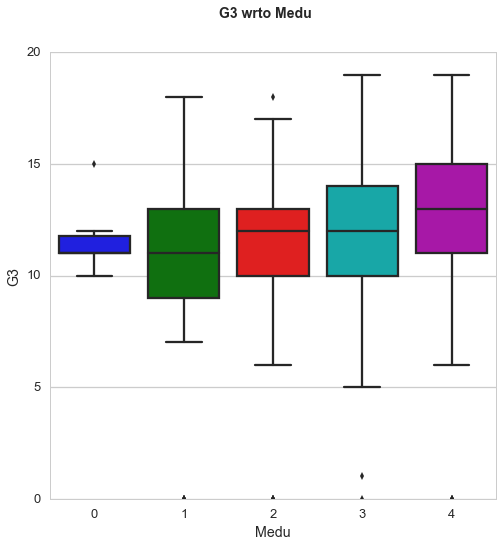

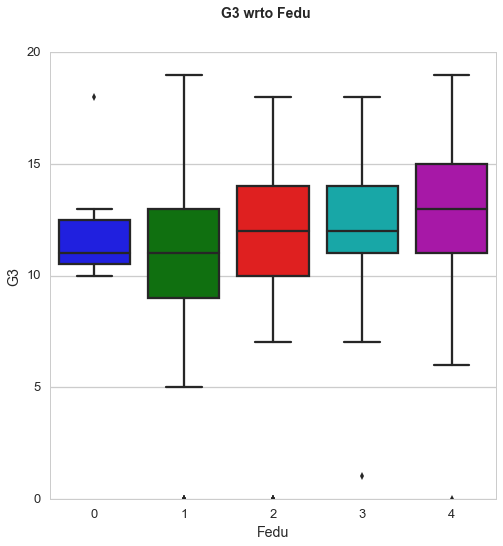

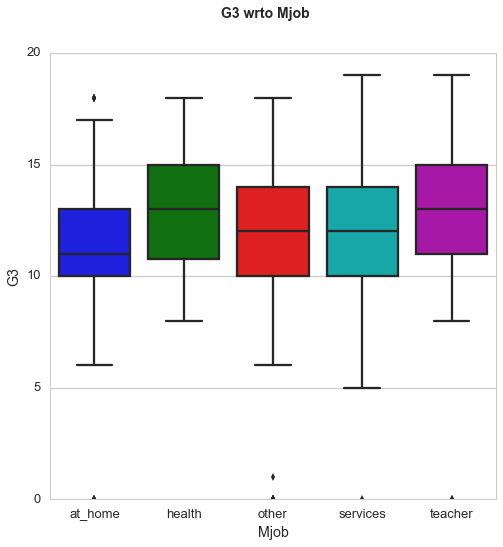

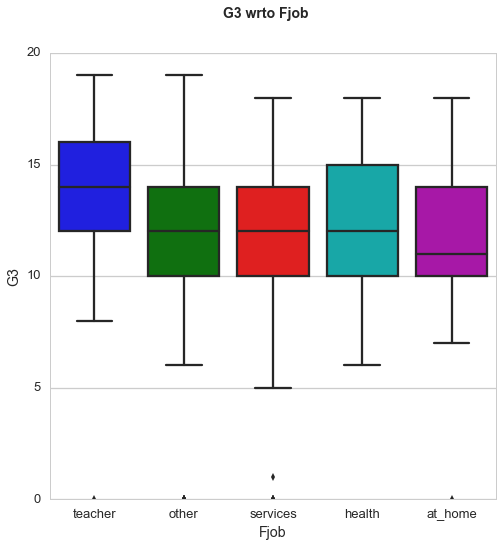

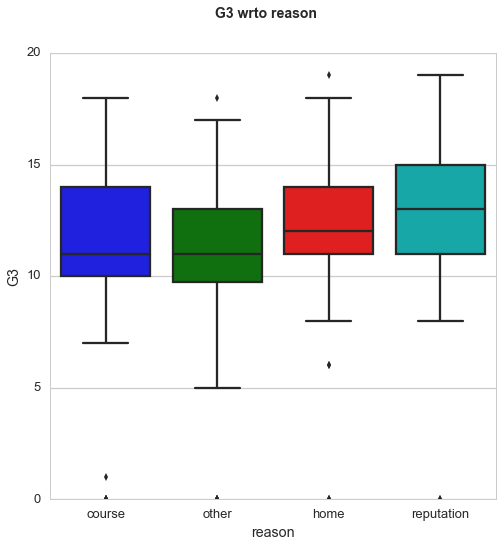

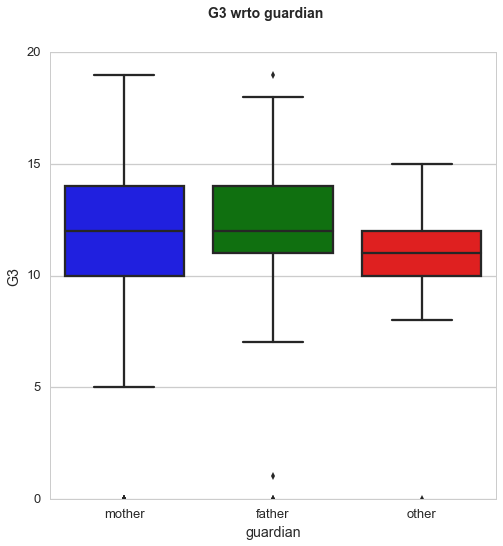

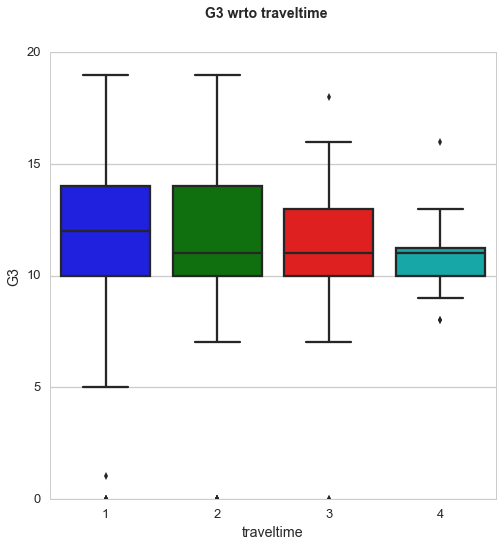

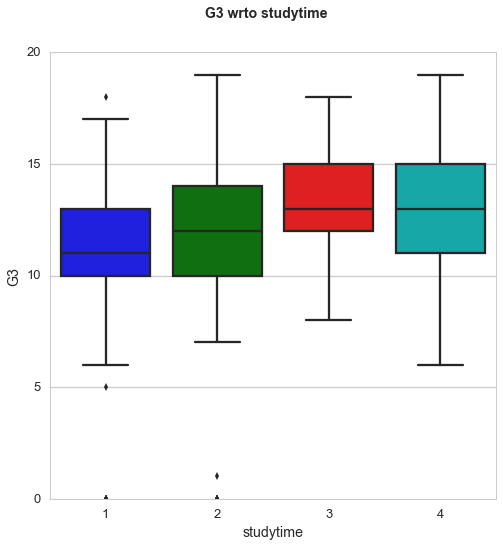

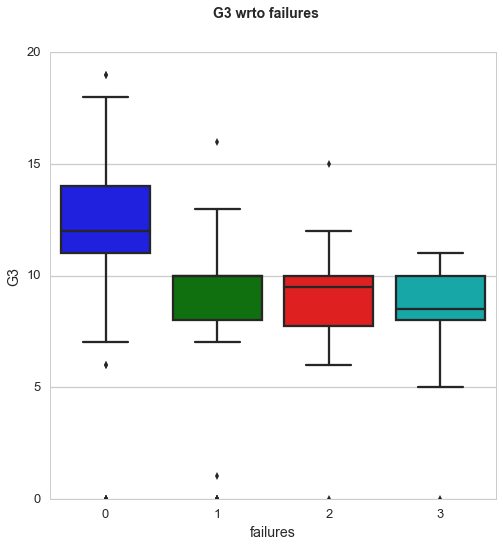

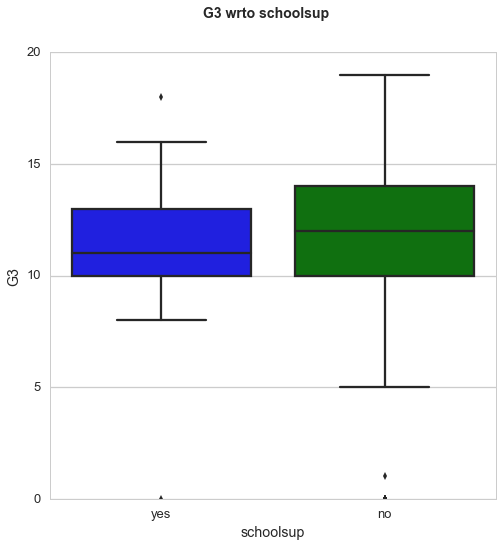

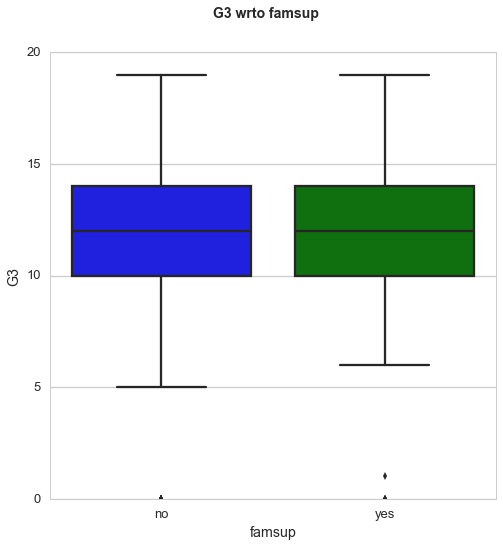

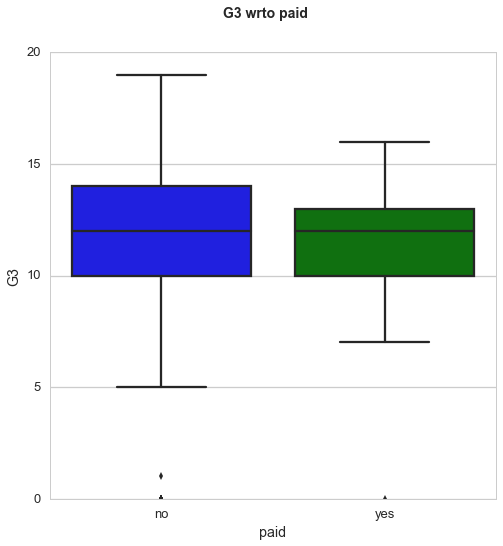

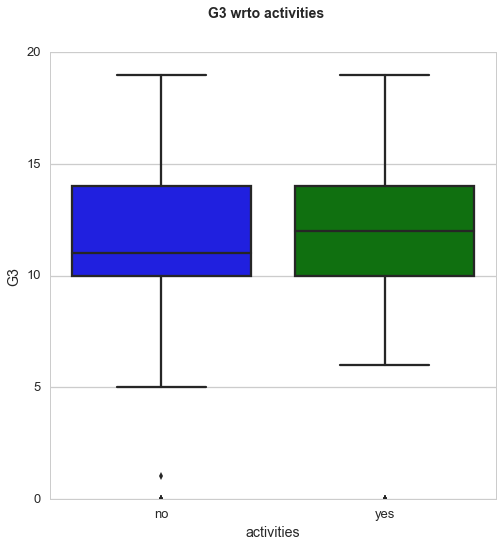

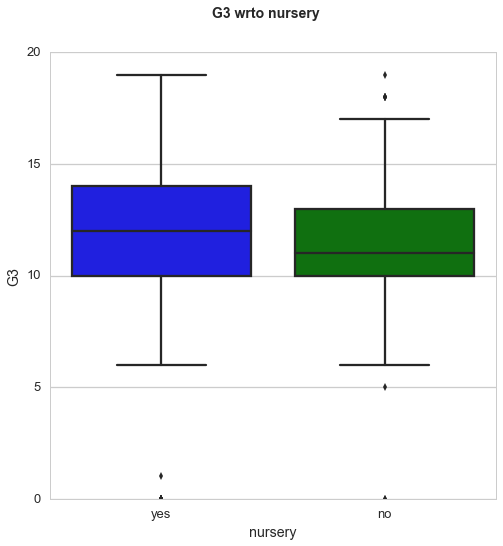

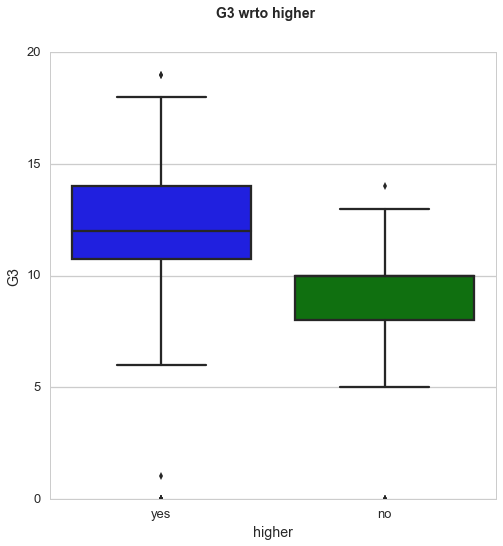

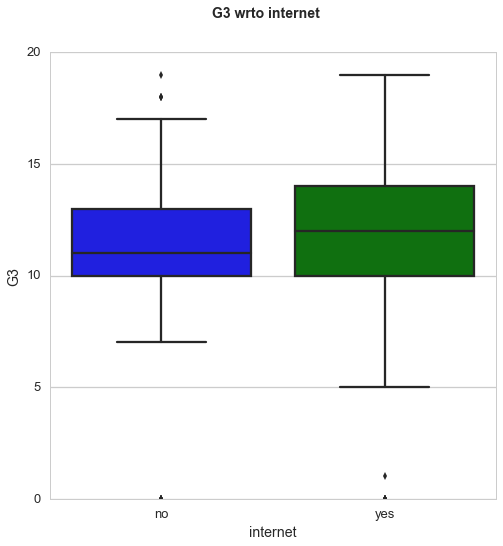

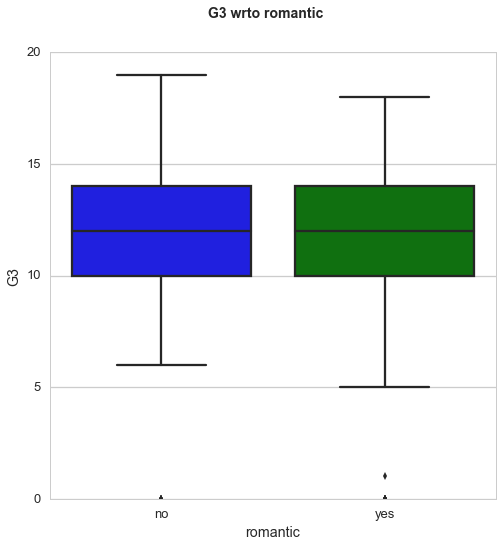

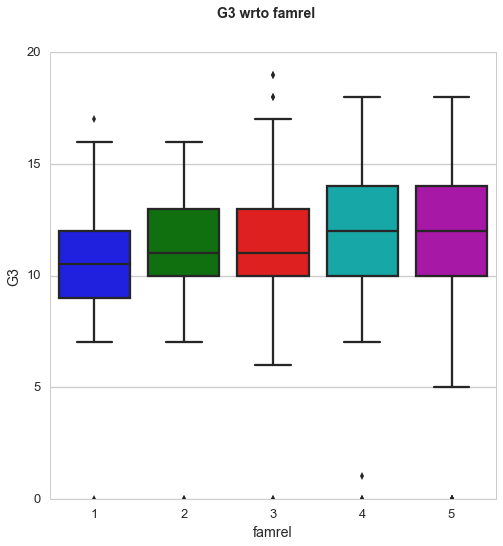

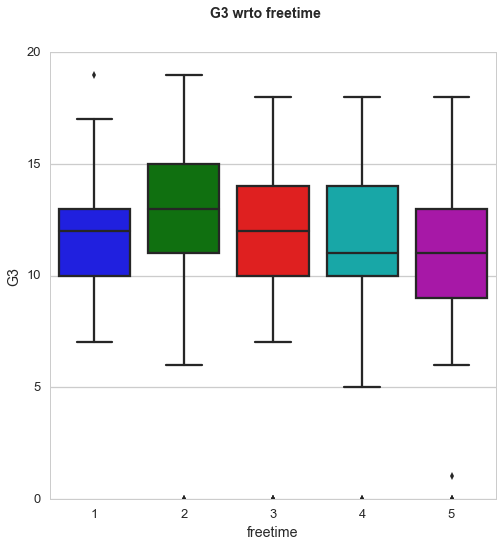

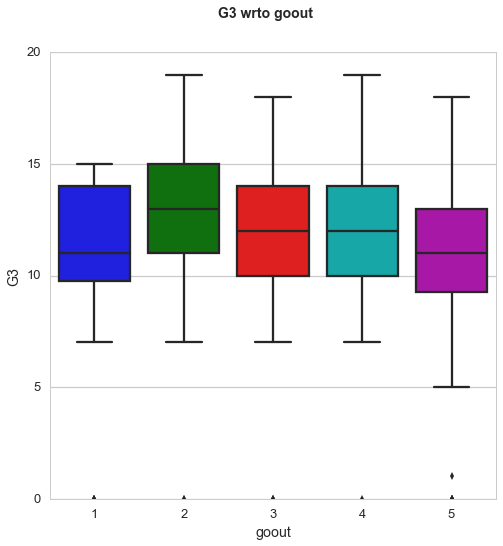

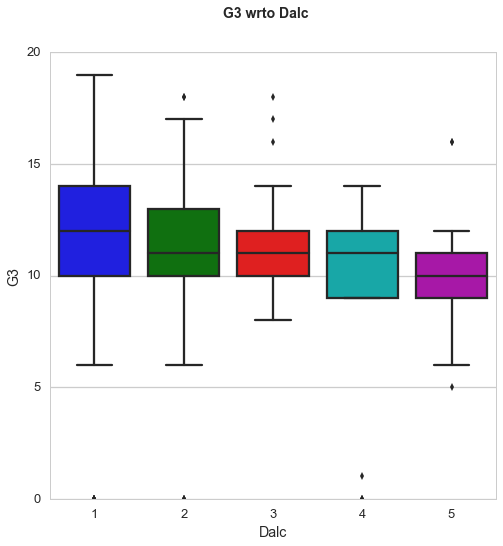

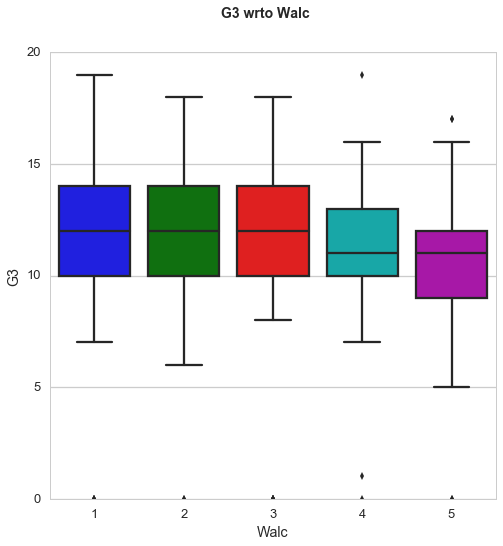

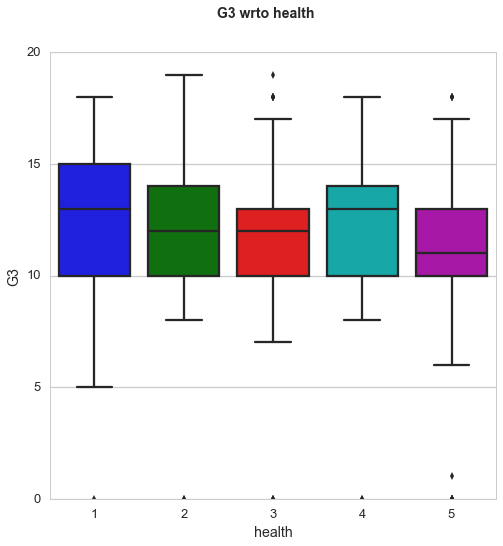

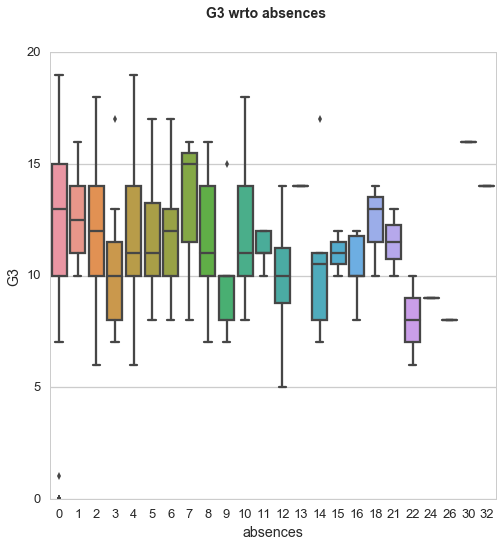

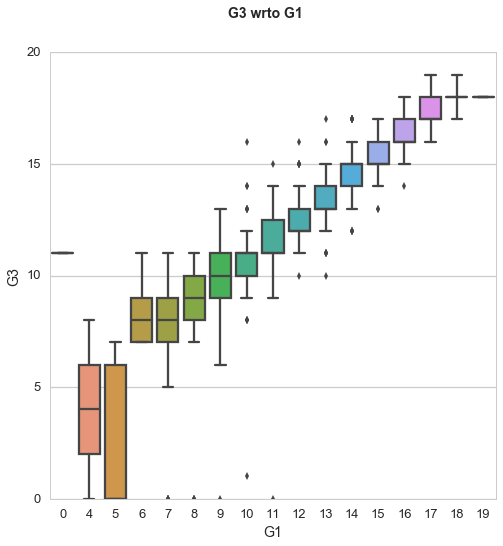

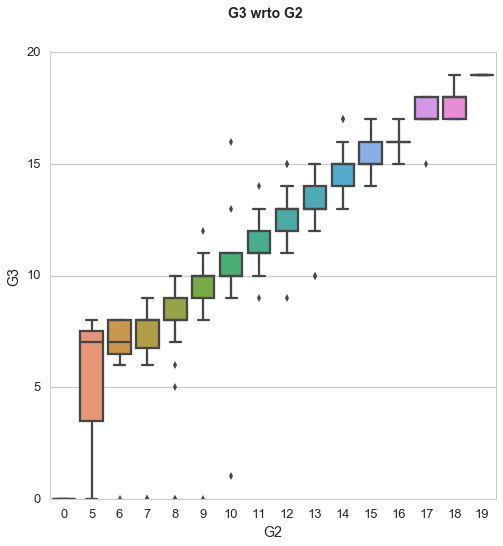

In [2]:
def MakeBoxPlot(X,Y,title):
    fig = plt.figure(figsize=(8,8))
    fig.suptitle(title, fontsize=14, fontweight='bold')
    sns.set_style("whitegrid")

    sns.set_context("talk")
    ax = sns.boxplot(x=X, y=Y)
    plt.show()
    
colNames=list(dataFrame)
for i in range(0,len(colNames)-1):#not including G3
        MakeBoxPlot(dataFrame[colNames[i]],dataFrame[colNames[-1]],"G3 wrto "+colNames[i])

We can see that there are no significant obvious dependencies except Education level (all three), failures, study time and Fjob. However there might be not obvious dependencies among the other features. Consider the correlation matrix of features.

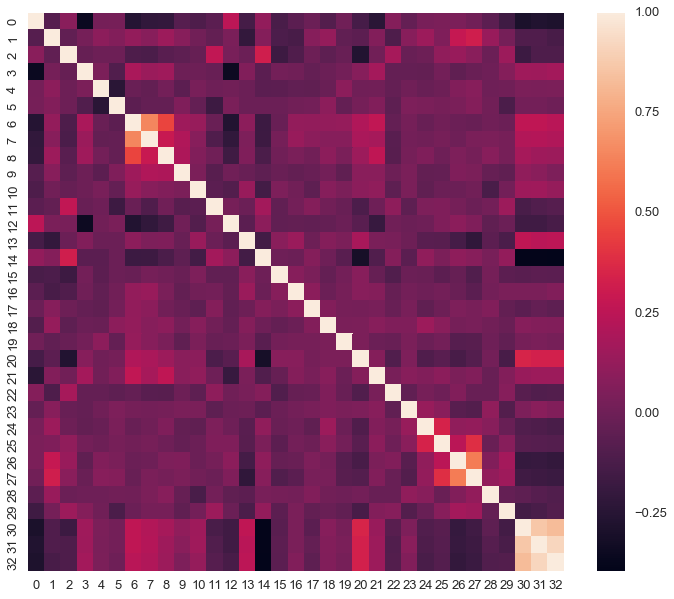

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [3]:
plt.figure(figsize=(12,10))

from sklearn import preprocessing

dF=dataFrame
for col in dF.columns:
    if(isinstance(dF[col][0],str)):
        le = preprocessing.LabelEncoder()
        le.fit(dF[col])
        dF[col]=le.transform(dF[col])
        
sns.heatmap(np.corrcoef(dF,rowvar=False))
print()
plt.show()
print(dF.columns)

In [4]:
print(dF.columns[6:9])
print(dF.columns[25:28])
print(dF.columns[14])

Index(['Medu', 'Fedu', 'Mjob'], dtype='object')
Index(['goout', 'Dalc', 'Walc'], dtype='object')
failures


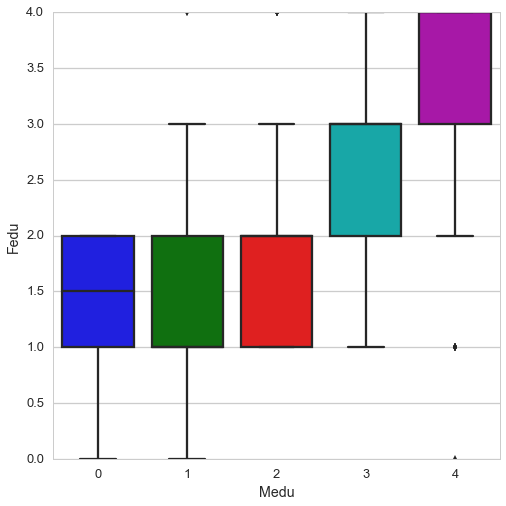

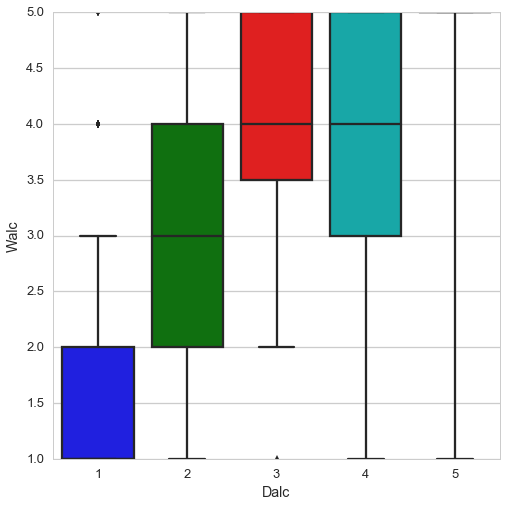

In [5]:

MakeBoxPlot(dF[dF.columns[6]],dF[dF.columns[7]],"")
MakeBoxPlot(dF[dF.columns[26]],dF[dF.columns[27]],"")

It is clearly seen that features 'Medu','Fedu' are positively correlated. It could mean that the higher education level one parent has the higher will be the other's. So well-educated people usually choose well-educated partners. When it comes to Walc and Dalc, it is not so obvious because of high variances. Of course, all this hypothesis should be tested with correlation analysis, however it is not a topic of this assignment.

The grades G3 is strongly correlated with the previous ones. It is normal and logically good, because if person fails the exam, he is more likely to fail it again. This hypothesis might not be true for Math, but here it is obvious for Portuguese language.

First, we separate input and output.

In [6]:
X = dF[dF.columns[:-1]]
y = dF["G3"]

We need to perform feature selection to simplify our model. For simplicity let us do it in quite intuitive manner based on the boxplot analysis. Almost all features do not really matter in the final grade, except

In [7]:
selFeat=dF.columns[[0,1,2,11,12,14,20,22,24,25,26,27,28,29,30,31]]
print(selFeat)

Index(['school', 'sex', 'age', 'guardian', 'traveltime', 'failures', 'higher',
       'romantic', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2'],
      dtype='object')


So, we use this features to train prediction model for target feature.

In [8]:
X = X[selFeat]
X.head()

,school,sex,age,guardian,traveltime,failures,higher,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,2,0,1,0,3,4,1,1,3,4,0,11
1,0,0,17,0,1,0,1,0,3,3,1,1,3,2,9,11
2,0,0,15,1,1,0,1,0,3,2,2,3,3,6,12,13
3,0,0,15,1,1,0,1,1,2,2,1,1,5,0,14,14
4,0,0,16,0,1,0,1,0,3,2,1,2,5,0,11,13


We have already transform categorical features into numbers for correlation analysis. Now define the classes for the classification. Consider the following histograms.

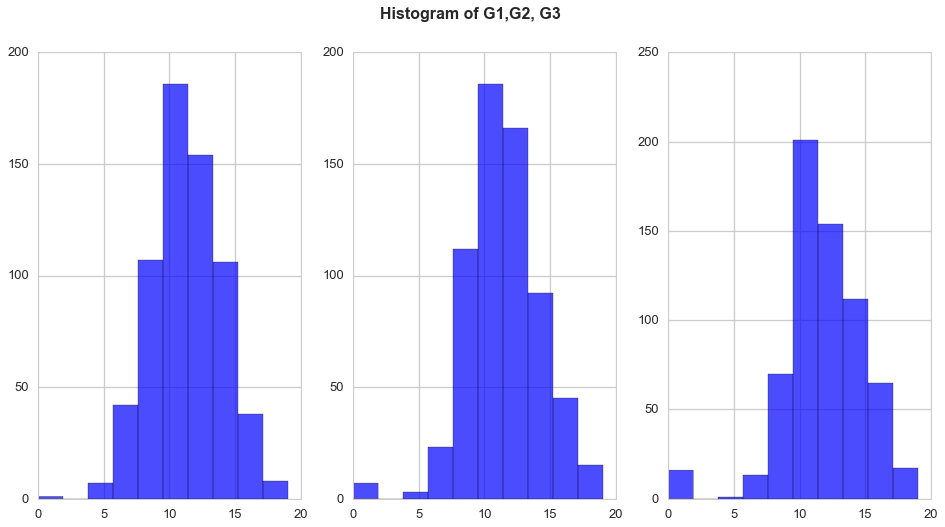

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(16,8))
#fig = plt.figure(figsize=(10,8))
axes[0].hist(dataFrame["G1"], alpha=.7)
axes[1].hist(dataFrame["G2"], alpha=.7)
axes[2].hist(dataFrame["G3"], alpha=.7)
fig.suptitle("Histogram of G1,G2, G3", fontsize=16, fontweight='bold')
plt.show()

Note that input and output are not balanced: there are a lot of people with grades between 10 and 15, but much less got other marks. Instead of considering 20 grades let us consider grades from 0 to 3 with the following transformation rule.

In [10]:

for i in range(0,len(dataFrame["school"])):
        if(dataFrame["G3"][i]<10):
            y[i]=0
        else:
            if(dataFrame["G3"][i]<12):
                y[i]=1
            else:
                if(dataFrame["G3"][i]<15):
                    y[i]=2
                else:
                    y[i]=3
                    
        if(X["G2"][i]<10):
            X["G2"][i]=0
        else:
            if(X["G2"][i]<12):
                X["G2"][i]=1
            else:
                if(dataFrame["G2"][i]<15):
                    X["G2"][i]=2
                else:
                    X["G2"][i]=3
                    
        if(X["G1"][i]<10):
            X["G1"][i]=0
        else:
            if(X["G1"][i]<12):
                X["G1"][i]=1
            else:
                if(dataFrame["G1"][i]<15):
                    X["G1"][i]=2
                else:
                    X["G1"][i]=3

In [11]:
X.head()

,school,sex,age,guardian,traveltime,failures,higher,romantic,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,2,0,1,0,3,4,1,1,3,4,0,1
1,0,0,17,0,1,0,1,0,3,3,1,1,3,2,0,1
2,0,0,15,1,1,0,1,0,3,2,2,3,3,6,2,2
3,0,0,15,1,1,0,1,1,2,2,1,1,5,0,2,2
4,0,0,16,0,1,0,1,0,3,2,1,2,5,0,1,2


## Selecting and testing ML model

Because of categorical features it is worth trying Naive Bayesian classifier. We also are able to try neural networks or regressions, but it requires additional binarization which not always helps. Additionally, it will make the model more complex. The precision-recall and F1 metrics for each class will be calculated in cross-validation procedure (which is a KFold method with K=15). Mainly we focus on getting better quality.

First, let us define some service functions.


In [47]:

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from itertools import cycle
from scipy import interp

def PlotROC(y_test,y_score,n_classes,title,figsize=(8,8)):
    #partially inherited from http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    
    lw=2
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=figsize)
    
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()
    


Let us construct models for multiclass classification.

### Naive Bayesian Classifier

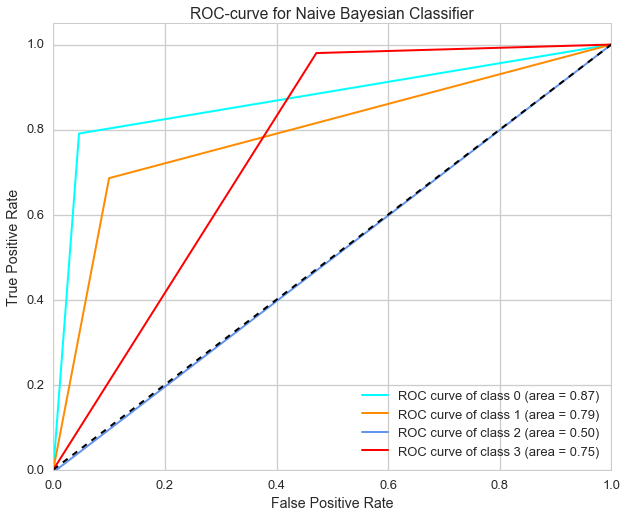

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize

yb = label_binarize(y, classes=[0, 1, 2,3])

clf=GaussianNB()
cvScores =cross_val_score(clf,X,y,cv=15,scoring="accuracy")


clf=GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


clf.fit(X_train,y_train)


y_scoreb = label_binarize(clf.predict(X_test), classes=[0, 1, 2,3])
y_testb = label_binarize(y_test, classes=[0, 1, 2,3])

PlotROC(y_testb,y_scoreb,4,'ROC-curve for Naive Bayesian Classifier',figsize=(10,8))


As we can see, the multi-class accuracy is bad, we can built the gaussian confidence interval for mean accuracy. Due to relatively simple model we can do enough CV-tests to do it accurately.

In [74]:
print("Average accuracy is "+str(np.mean(cvScores))+" +-"+str(np.std(cvScores)*3))

Average accuracy is 0.521835798495 +-0.186829135953


Now, build a cv-procedure for computing accuracy,precision, recall and f-measure of binary classification. We use stratifiedKFold and train multi-class classifier, but then test it as one vs rest for all classes.

In [113]:
from sklearn.model_selection import StratifiedKFold

def MultiClassBinaryCV(clf,N,Xs,ys):
    acc=[]
    prec=[]
    rec=[]
    fmeasure=[]

    skf = StratifiedKFold(N,shuffle=True)

    Xa = Xs.values
    k=-1
    for train_index, test_index in skf.split(Xa, ys):
        k=k+1

        clf.fit(Xa[train_index],ys[train_index])
        y_scoreb = label_binarize(clf.predict(Xa[test_index]), classes=[0, 1, 2,3])
        y_testb = label_binarize(ys[test_index], classes=[0, 1, 2,3])

        tp=[np.sum([y_testb[i,k]*y_scoreb[i,k] for i in range(0,len(y_testb))]) for k in range(0,4)]
        fp=[np.sum([(1-y_testb[i,k])*y_scoreb[i,k] for i in range(0,len(y_testb))]) for k in range(0,4)]
        tn=[np.sum([(1-y_testb[i,k])*(1-y_scoreb[i,k]) for i in range(0,len(y_testb))]) for k in range(0,4)]
        fn=[np.sum([y_testb[i,k]*(1-y_scoreb[i,k]) for i in range(0,len(y_testb))]) for k in range(0,4)]

        acc.append([(tp[i]+tn[i])/(tp[i]+fp[i]+tn[i]+fn[i]) for i in range(0,4)])
        prec.append([tp[i]/(tp[i]+fp[i]) for i in range(0,4)])
        rec.append([tp[i]/(tp[i]+fn[i]) for i in range(0,4)])
        fmeasure.append([2/(1/prec[k][i]+1/rec[k][i]) for i in range(0,4)])

    print("Classification measures for each class")
    for i in range(0,4):
        print("Class "+str(i))
        print("Average accuracy is "+str(np.mean([acc[k][i] for k in range(0,N)])))
        print("Average precision is "+str(np.mean([prec[k][i] for k in range(0,N)])))
        print("Average recall is "+str(np.mean([rec[k][i] for k in range(0,N)])))
        print("Average fmeasure is "+str(np.mean([fmeasure[k][i] for k in range(0,N)])))

MultiClassBinaryCV(clf,20,X,y)

Classification measures for each class
Class 0
Average accuracy is 0.92010199241
Average precision is 0.731071428571
Average recall is 0.8
Average fmeasure is 0.752752525253
Class 1
Average accuracy is 0.799593539762
Average precision is 0.718104256854
Average recall is 0.581363636364
Average fmeasure is 0.633250773994
Class 2
Average accuracy is 0.631642444368
Average precision is nan
Average recall is 0.0604545454545
Average fmeasure is nan
Class 3
Average accuracy is 0.690378464436
Average precision is 0.393321572219
Average recall is 0.97619047619
Average fmeasure is 0.560154675226


As we can see from the ROC-curves and classification metrics, class 2 is predicted really bad, ROC-curve states that we could flip a coin to guess the class 2 with the same success. Despite that, other classes are predicted quite well.

## Building multi-class classifier from several binary classifiers

We have applied really simple model of Naive Bayesian classifier which has no hyperparameters. It turned out to be extremely powerful in binary classification, but failed in pure multi-class with accuracy about 0.5. One can try tune the thresholds for each class as hyperparameters. Suppose we sequentially test classes 3,0,1 (ordered by descending recall) with thresholds alpha1,alpha2,alpha3.

The original classifier predicts strange probabilities which even do not sum up to one. So we use the standard sklearn Calibration method to handle it first.

In [147]:
# Load libraries
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV




def EnsembleClassifier(clfr,x,alphas,classes):
    #
    y=clfr.predict_proba(x)
    y=y[0]
    if(y[classes[0]]>alphas[0]):
        return classes[0]
    else:
        if(y[classes[1]]>alphas[1]):
            return classes[1]
        else:
            if(y[classes[2]]>alphas[2]):
                return classes[2]
            else:
                return classes[3]
            

def TrivialTuning(Xs,ys,N,K): #number of tests and K for kfold
    acc0=0
    rec0=0
    prec0=0
    fmeasure0=0
    
    alphas0=[0,0,0,0]
    classes0=[0,1,2,3]
    
    for i in range(0,N):
        classes=np.random.permutation(4)
        alphas= np.random.uniform(0,1,3)
        
        skf=StratifiedKFold(K,shuffle=True)
        Xa=Xs.values
       
        acc=0
        prec=[]
        rec=[]
        fmeasure=[]
        
        for train_index, test_index in skf.split(Xa, ys):
            clf_sigmoid = CalibratedClassifierCV(GaussianNB(), cv=5, method='sigmoid')
            clf_sigmoid.fit(Xa[train_index], ys[train_index])
            
            #print(Xa[test_index][1])
            y_score=[EnsembleClassifier(clf_sigmoid,[x],alphas,classes) for x in Xa[test_index]]
            y_test=np.array(ys[test_index])
            
            y_scoreb = label_binarize(clf.predict(Xa[test_index]), classes=[0, 1, 2,3])
            y_testb = label_binarize(ys[test_index], classes=[0, 1, 2,3])
            
            
            tp=[np.sum([y_testb[i,k]*y_scoreb[i,k] for i in range(0,len(y_testb))]) for k in range(0,4)]
            fp=[np.sum([(1-y_testb[i,k])*y_scoreb[i,k] for i in range(0,len(y_testb))]) for k in range(0,4)]
            tn=[np.sum([(1-y_testb[i,k])*(1-y_scoreb[i,k]) for i in range(0,len(y_testb))]) for k in range(0,4)]
            fn=[np.sum([y_testb[i,k]*(1-y_scoreb[i,k]) for i in range(0,len(y_testb))]) for k in range(0,4)]
            
        
            acc=acc+ np.sum([int(y_score[k]==y_test[k]) for k in range(0,len(y_score))])/len(y_score)
            prec.append([tp[i]/(tp[i]+fp[i]) for i in range(0,4)])
            rec.append([tp[i]/(tp[i]+fn[i]) for i in range(0,4)])
            fmeasure.append([2/(1/prec[-1][i]+1/rec[-1][i]) for i in range(0,4)])
        
        acc= acc/K
        #print(prec)
        prec=[np.mean([prec[k][i] for k in range(0,K)]) for i in range(0,4)]
        rec=[np.mean([rec[k][i] for k in range(0,K)]) for i in range(0,4)]
        fmeasure=[np.mean([fmeasure[k][i] for k in range(0,K)]) for i in range(0,4)]
        
        if(acc>acc0):#optimize accuracy
            acc0=acc
            rec0=rec
            prec0=prec
            fmeasure0=fmeasure
            classes0=list(classes)
            alphas0=list(alphas)
            
    return (acc0,prec0,rec0,fmeasure0,classes0,alphas0,clf_sigmoid)

(acc,prec,rec,fmeasure,classes,alphas,clf1)=TrivialTuning(X,y,100,20)
print("Optimal hyperparameters classesHierarchy="+str(classes)+" alphas="+str(alphas))
print("Mean accuracy is "+str(acc))
print("Mean precision is "+str(prec))
print("Mean recall is "+str(rec))
print("Mean fmeasure is "+str(fmeasure))

Optimal hyperparameters classesHierarchy=[2, 0, 3, 1] alphas=[0.37849210120994392, 0.22231085762651948, 0.37754684226374668]
Mean accuracy is 0.645590211891
Mean precision is [0.76910714285714277, 0.75138888888888888, nan, 0.40463146223401641]
Mean recall is [0.82000000000000006, 0.56272727272727274, 0.10045454545454546, 0.98452380952380947]
Mean fmeasure is [0.78071983571983572, 0.63830655069045172, nan, 0.57235923496793051]


## Conclusion

To sum up, we got good classifier which does binary predictions relatively well. It turned that the probabilities of Bayesian clasifier are not calibrated so the calibration was performed. Then We have tried to built optimal model for multi-class classfication and it resulted in mean accuracy of 0.64 which is better than the usual Naive Bayesian classifier.

It worth trying to apply other ML models which works well with categorical input such as decision trees, logistic regression and neural networks. Here we just have tested one possible approach to prediction problem.